# LIBRARY YANG DIGUNAKAN

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

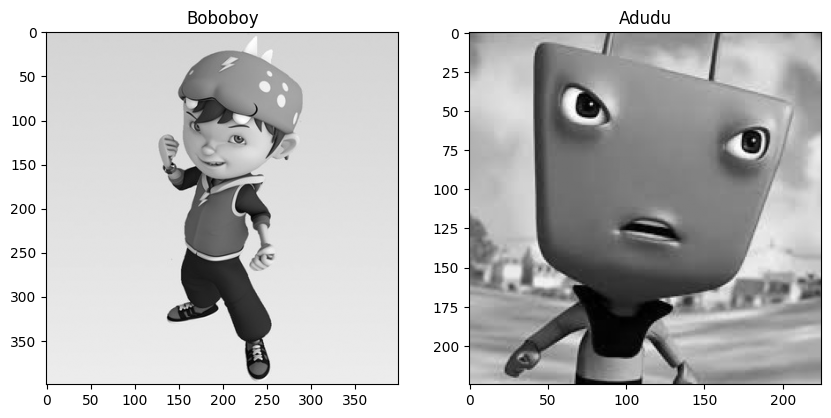

In [12]:
adudu = cv2.imread('Assets/Adudu.jpg')
adudu = cv2.cvtColor(adudu, cv2.COLOR_BGR2GRAY)

boboboy = cv2.imread('Assets/boboiboy.jpg')
boboboy = cv2.cvtColor(boboboy, cv2.COLOR_BGR2GRAY)
figure, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Boboboy')
plt.imshow(boboboy, cmap='gray')
plt.axis('on')
plt.subplot(1, 2, 2)
plt.title('Adudu')
plt.imshow(adudu, cmap='gray')
plt.axis('on')

plt.show()

# FUNGSI PAD UNTUK MELAKUKAN KONVOLUSI

In [13]:
def pad_image(image, pad_size):
    h, w = image.shape
    padded = np.zeros((h + 2 * pad_size, w + 2 * pad_size), dtype=np.float32)
    padded[pad_size:h + pad_size, pad_size:w + pad_size] = image
    return padded

# FUNGSI MEAN

In [14]:
def mean_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded = pad_image(image, pad_size)
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            result[i, j] = np.mean(padded[i:i + kernel_size, j:j + kernel_size])
    
    return np.clip(result, 0, 255).astype(np.uint8)

# FUNGSI SHARPENING

In [15]:
def sharpening_filter(image):
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    
    kernel = np.array([[1/9, 1/9, 1/9],
                       [1/9, 8/9, 1/9],
                       [1/9, 1/9, 1/9]])
    
    padded = np.pad(image, ((1, 1), (1, 1)), mode='reflect')
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + 3, j:j + 3]
            result[i, j] = np.sum(window * kernel)
    
   
    blur_kernel = np.ones((3, 3)) / 9
    padded_blur = np.pad(image, ((1, 1), (1, 1)), mode='reflect')
    blurred = np.zeros_like(image, dtype=np.float32)
    for i in range(h):
        for j in range(w):
            window = padded_blur[i:i + 3, j:j + 3]
            blurred[i, j] = np.sum(window * blur_kernel)

    amount = 1.0
    sharpened = image.astype(np.float32) + amount * (image.astype(np.float32) - blurred)
    
    return np.clip(sharpened, 0, 255).astype(np.uint8)

# FUNGSI SMOOTHING

In [16]:
def smoothing_filter(image):
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    padded = pad_image(image, 1)
    kernel = np.array([[1/10, 1/10, 1/10], 
                       [1/10, 1/5, 1/10], 
                       [1/10, 1/10, 1/10]])
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + 3, j:j + 3]
            result[i, j] = np.sum(window * kernel)
    
    return np.clip(result, 0, 255).astype(np.uint8)

# FUNGSI MODUS UNTUK MODUS 3X3 DAN 9X9

In [17]:
def modus_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='reflect')
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + kernel_size, j:j + kernel_size]
            values, counts = np.unique(window, return_counts=True)
            max_count_idx = np.argmax(counts)
            result[i, j] = values[max_count_idx]
    
    return np.clip(result, 0, 255).astype(np.uint8)

# FUNGSI MEDIAN UNTUK MEDIAN 3X3 DAN 9X9

In [18]:
def median_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded = pad_image(image, pad_size)
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + kernel_size, j:j + kernel_size].flatten()
            result[i, j] = np.median(window)
    
    return result

# MENGGABUNGKAN SEMUA FILTER

In [19]:
mean_3x3 = mean_filter(adudu, 3)
mean_9x9 = mean_filter(adudu, 9)
sharpened = sharpening_filter(adudu)
smoothed = smoothing_filter(adudu)
modus_3x3 = modus_filter(adudu, 3)
modus_9x9 = modus_filter(adudu, 9)
median_3x3 = median_filter(adudu, 3)
median_9x9 = median_filter(adudu, 9)

# MENAMPILKAN GAMBAR YANG SUDAH DIMASUKKAN SEMUA FILTER

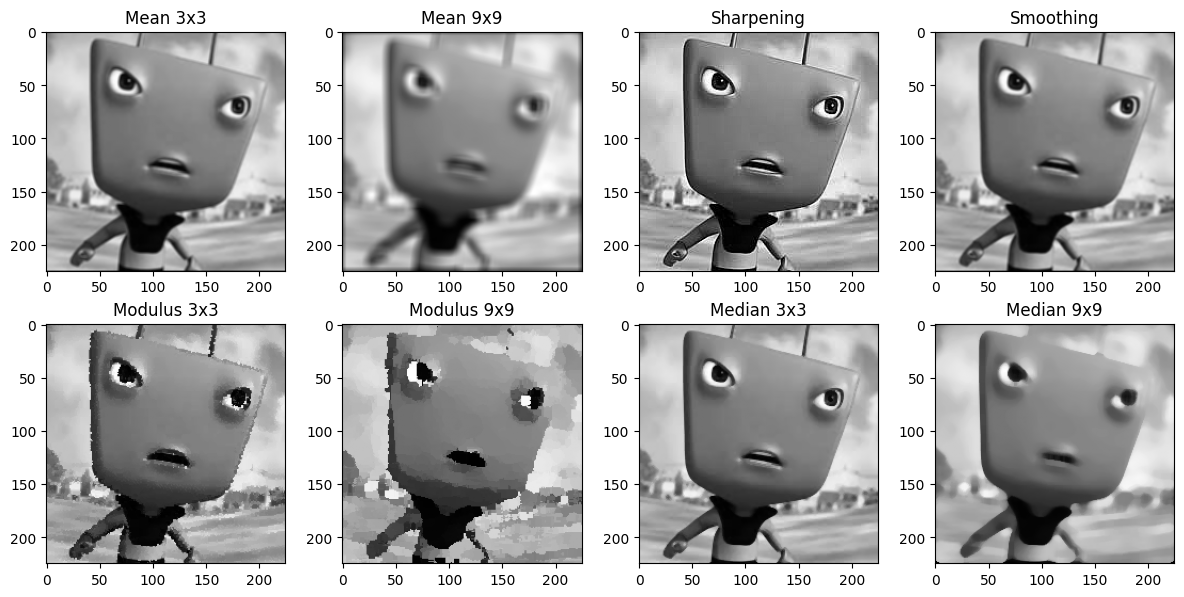

In [20]:

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes[0, 0].imshow(mean_3x3, cmap='gray')
axes[0, 0].set_title('Mean 3x3')
axes[0, 0].axis('on')

axes[0, 1].imshow(mean_9x9, cmap='gray')
axes[0, 1].set_title('Mean 9x9')
axes[0, 1].axis('on')

axes[0, 2].imshow(sharpened, cmap='gray')
axes[0, 2].set_title('Sharpening')
axes[0, 2].axis('on')

axes[0, 3].imshow(smoothed, cmap='gray')
axes[0, 3].set_title('Smoothing')
axes[0, 3].axis('on')

axes[1, 0].imshow(modus_3x3, cmap='gray')
axes[1, 0].set_title('Modulus 3x3')
axes[1, 0].axis('on')

axes[1, 1].imshow(modus_9x9, cmap='gray')
axes[1, 1].set_title('Modulus 9x9')
axes[1, 1].axis('on')

axes[1, 2].imshow(median_3x3, cmap='gray')
axes[1, 2].set_title('Median 3x3')
axes[1, 2].axis('on')

axes[1, 3].imshow(median_9x9, cmap='gray')
axes[1, 3].set_title('Median 9x9')
axes[1, 3].axis('on')

plt.tight_layout()
plt.show()

# OPERATOR SOBEL

In [21]:
def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    padded = pad_image(image, 1)
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + 3, j:j + 3]
            gx = np.sum(window * sobel_x)
            gy = np.sum(window * sobel_y)
            result[i, j] = np.sqrt(gx**2 + gy**2)
    
    return np.clip(result, 0, 255).astype(np.uint8)

# MENGGABUNGKAN SEMUA FILTER

In [22]:
sobel_mean_3x3 = sobel_operator(mean_3x3)
sobel_mean_9x9 = sobel_operator(mean_9x9)
sobel_sharpened = sobel_operator(sharpened)
sobel_smoothed = sobel_operator(smoothed)
sobel_modus_3x3 = sobel_operator(modus_3x3)
sobel_modus_9x9 = sobel_operator(modus_9x9)
sobel_median_3x3 = sobel_operator(median_3x3)
sobel_median_9x9 = sobel_operator(median_9x9)

# MENAMPILKAN GAMBAR YANG SUDAH DIMASUKKAN FILTER OPERATOR SOBEL

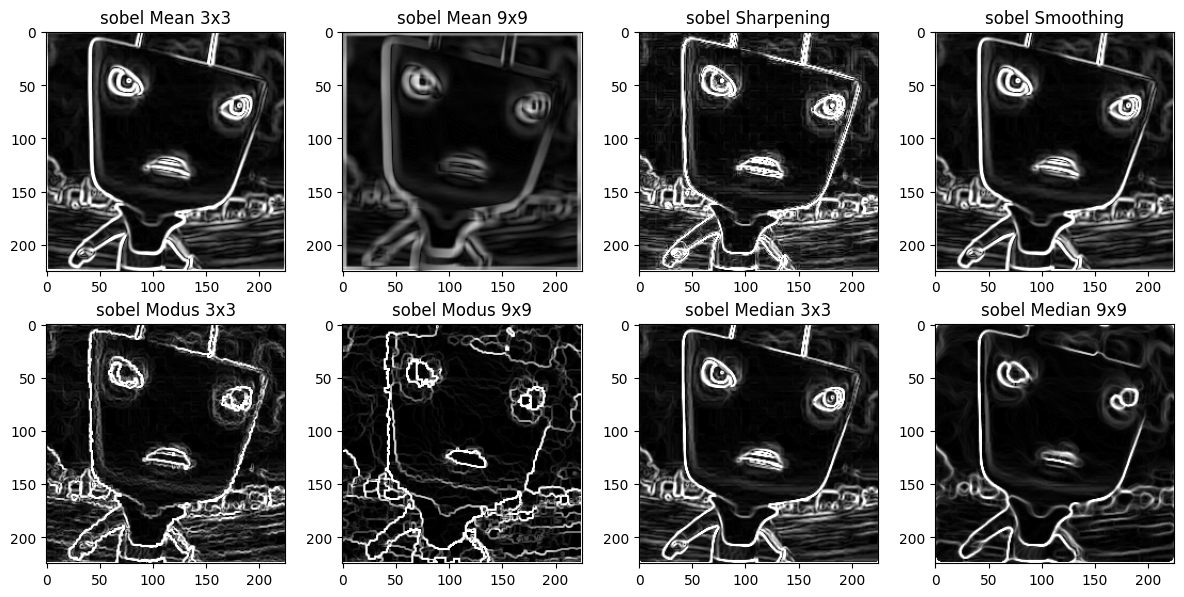

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes[0, 0].imshow(sobel_mean_3x3, cmap='gray')
axes[0, 0].set_title('sobel Mean 3x3')
axes[0, 0].axis('on')

axes[0, 1].imshow(sobel_mean_9x9, cmap='gray')
axes[0, 1].set_title('sobel Mean 9x9')
axes[0, 1].axis('on')

axes[0, 2].imshow(sobel_sharpened, cmap='gray')
axes[0, 2].set_title('sobel Sharpening')
axes[0, 2].axis('on')

axes[0, 3].imshow(sobel_smoothed, cmap='gray')
axes[0, 3].set_title('sobel Smoothing')
axes[0, 3].axis('on')

axes[1, 0].imshow(sobel_modus_3x3, cmap='gray')
axes[1, 0].set_title('sobel Modus 3x3')
axes[1, 0].axis('on')

axes[1, 1].imshow(sobel_modus_9x9, cmap='gray')
axes[1, 1].set_title('sobel Modus 9x9')
axes[1, 1].axis('on')

axes[1, 2].imshow(sobel_median_3x3, cmap='gray')
axes[1, 2].set_title('sobel Median 3x3')
axes[1, 2].axis('on')

axes[1, 3].imshow(sobel_median_9x9, cmap='gray')
axes[1, 3].set_title('sobel Median 9x9')
axes[1, 3].axis('on')

plt.tight_layout()
plt.show()

# OPERATOR ROBERTS

In [24]:
def roberts_operator(image):
    roberts_x = np.array([[1, 0], [0, -1]])
    roberts_y = np.array([[0, 1], [-1, 0]])
    
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    padded = pad_image(image, 1)
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + 2, j:j + 2]
            gx = np.sum(window * roberts_x)
            gy = np.sum(window * roberts_y)
            result[i, j] = np.sqrt(gx**2 + gy**2)
    
    return np.clip(result, 0, 255).astype(np.uint8)

roberts_result = roberts_operator(adudu)


# MENGGABUNGKAN SEMUA FILTER

In [25]:
roberts_mean_3x3 = roberts_operator(mean_3x3)
roberts_mean_9x9 = roberts_operator(mean_9x9)
roberts_sharpened = roberts_operator(sharpened)
roberts_smoothed = roberts_operator(smoothed)
roberts_modus_3x3 = roberts_operator(modus_3x3)
roberts_modus_9x9 = roberts_operator(modus_9x9)
roberts_median_3x3 = roberts_operator(median_3x3)
roberts_median_9x9 = roberts_operator(median_9x9)

# MENAMPILKAN GAMBAR YANG SUDAH DIMASUKKAN FILTER OPERATOR ROBERTS

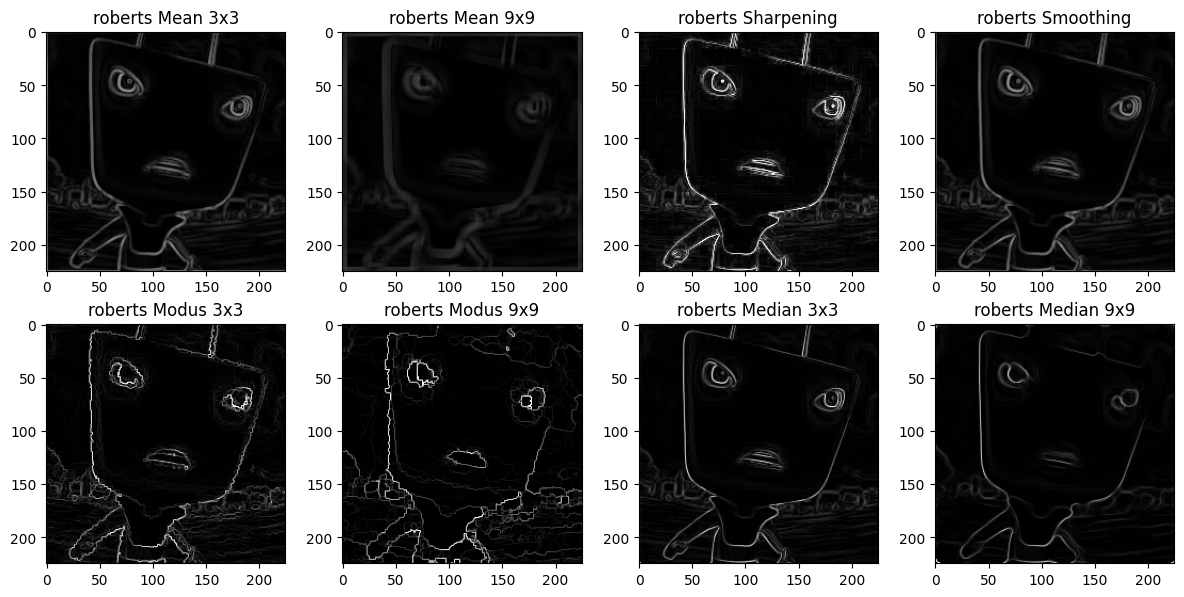

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes[0, 0].imshow(roberts_mean_3x3, cmap='gray')
axes[0, 0].set_title('roberts Mean 3x3')
axes[0, 0].axis('on')

axes[0, 1].imshow(roberts_mean_9x9, cmap='gray')
axes[0, 1].set_title('roberts Mean 9x9')
axes[0, 1].axis('on')

axes[0, 2].imshow(roberts_sharpened, cmap='gray')
axes[0, 2].set_title('roberts Sharpening')
axes[0, 2].axis('on')

axes[0, 3].imshow(roberts_smoothed, cmap='gray')
axes[0, 3].set_title('roberts Smoothing')
axes[0, 3].axis('on')

axes[1, 0].imshow(roberts_modus_3x3, cmap='gray')
axes[1, 0].set_title('roberts Modus 3x3')
axes[1, 0].axis('on')

axes[1, 1].imshow(roberts_modus_9x9, cmap='gray')
axes[1, 1].set_title('roberts Modus 9x9')
axes[1, 1].axis('on')

axes[1, 2].imshow(roberts_median_3x3, cmap='gray')
axes[1, 2].set_title('roberts Median 3x3')
axes[1, 2].axis('on')

axes[1, 3].imshow(roberts_median_9x9, cmap='gray')
axes[1, 3].set_title('roberts Median 9x9')
axes[1, 3].axis('on')

plt.tight_layout()
plt.show()

# OPERATOR PREWITT

In [27]:
def prewitt_operator(image):
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    padded = pad_image(image, 1)
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + 3, j:j + 3]
            gx = np.sum(window * prewitt_x)
            gy = np.sum(window * prewitt_y)
            result[i, j] = np.sqrt(gx**2 + gy**2)
    
    return np.clip(result, 0, 255).astype(np.uint8)

prewitt_result = prewitt_operator(adudu)

# MENGGABUNGKAN SEMUA FILTER

In [28]:
prewitt_mean_3x3 = prewitt_operator(mean_3x3)
prewitt_mean_9x9 = prewitt_operator(mean_9x9)
prewitt_sharpened = prewitt_operator(sharpened)
prewitt_smoothed = prewitt_operator(smoothed)
prewitt_modus_3x3 = prewitt_operator(modus_3x3)
prewitt_modus_9x9 = prewitt_operator(modus_9x9)
prewitt_median_3x3 = prewitt_operator(median_3x3)
prewitt_median_9x9 = prewitt_operator(median_9x9)

# MENAMPILKAN GAMBAR YANG SUDAH DIMASUKKAN FILTER OPERATOR PREWITT

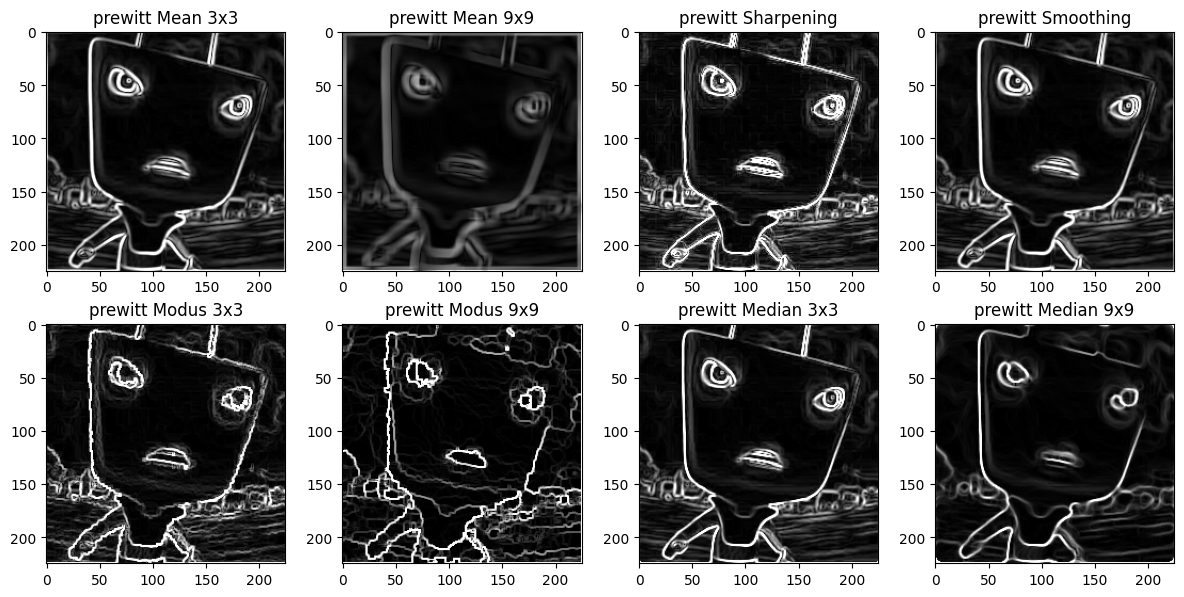

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes[0, 0].imshow(prewitt_mean_3x3, cmap='gray')
axes[0, 0].set_title('prewitt Mean 3x3')
axes[0, 0].axis('on')

axes[0, 1].imshow(prewitt_mean_9x9, cmap='gray')
axes[0, 1].set_title('prewitt Mean 9x9')
axes[0, 1].axis('on')

axes[0, 2].imshow(prewitt_sharpened, cmap='gray')
axes[0, 2].set_title('prewitt Sharpening')
axes[0, 2].axis('on')

axes[0, 3].imshow(prewitt_smoothed, cmap='gray')
axes[0, 3].set_title('prewitt Smoothing')
axes[0, 3].axis('on')

axes[1, 0].imshow(prewitt_modus_3x3, cmap='gray')
axes[1, 0].set_title('prewitt Modus 3x3')
axes[1, 0].axis('on')

axes[1, 1].imshow(prewitt_modus_9x9, cmap='gray')
axes[1, 1].set_title('prewitt Modus 9x9')
axes[1, 1].axis('on')

axes[1, 2].imshow(prewitt_median_3x3, cmap='gray')
axes[1, 2].set_title('prewitt Median 3x3')
axes[1, 2].axis('on')

axes[1, 3].imshow(prewitt_median_9x9, cmap='gray')
axes[1, 3].set_title('prewitt Median 9x9')
axes[1, 3].axis('on')

plt.tight_layout()
plt.show()

# MENAMPILKAN BOBOBOY DENGAN CITRA YANG SUDAH DIPERBAIKI DAN DETEKSI TEPI

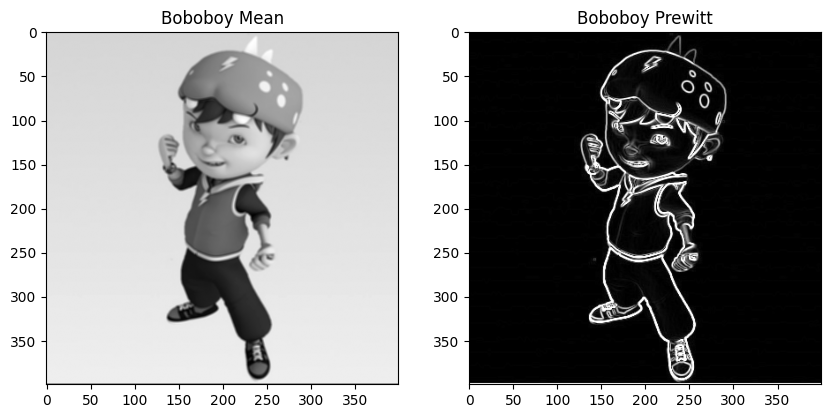

In [30]:
mean_3x3 = mean_filter(boboboy, 3)
mean_3x3_prewitt = prewitt_operator(boboboy)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Boboboy Mean')
plt.imshow(mean_3x3, cmap='gray')
plt.axis('on')
plt.subplot(1, 2, 2)
plt.title('Boboboy Prewitt')
plt.imshow(mean_3x3_prewitt, cmap='gray')
plt.axis('on')
plt.show()

# FUNGSI DILATASI UNTUK OPERASI PREWITT

In [31]:
def prewitt_edge_detection(image):
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])

    padded = np.pad(image, ((1, 1), (1, 1)), mode='constant')

    for i in range(h):
        for j in range(w):
            window = padded[i:i + 3, j:j + 3]
            gx = np.sum(window * kernel_x)
            gy = np.sum(window * kernel_y)
            result[i, j] = (np.abs(gx) + np.abs(gy)) * 4
    
    max_val = np.max(result)
    if max_val > 0:
        result = (result / max_val) * 255
    result = np.where(result > 20, 255, 0)
    return np.clip(result, 0, 255).astype(np.uint8)

def dilate_image(image, kernel_size=3):
    h, w = image.shape
    pad_size = kernel_size // 2
    padded = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    result = np.zeros_like(image, dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + kernel_size, j:j + kernel_size]
            if np.any(window == 255):
                result[i, j] = 255
            else:
                result[i, j] = 0
    
    return result

def prewitt_with_dilation(image):
    edges = prewitt_edge_detection(image)
    dilated = dilate_image(edges, kernel_size= 3)
    return dilated

# MENAMPILKAN GAMBAR BOBOBOY DENGAN MODE ULTRA INSTINCT

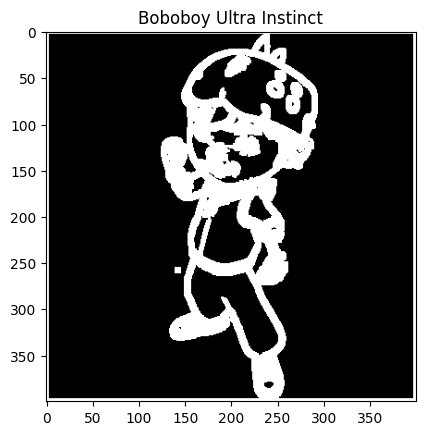

In [32]:
boboboy_ultra_instinct = prewitt_with_dilation(mean_3x3_prewitt)
plt.imshow(boboboy_ultra_instinct, cmap='gray')
plt.title('Boboboy Ultra Instinct')
plt.axis('on')
plt.show()

# MENAMPILKAN GAMBAR BOBOBOY DENGAN MODE ULTRA INSTINCT DENGAN METODE MEDIAN

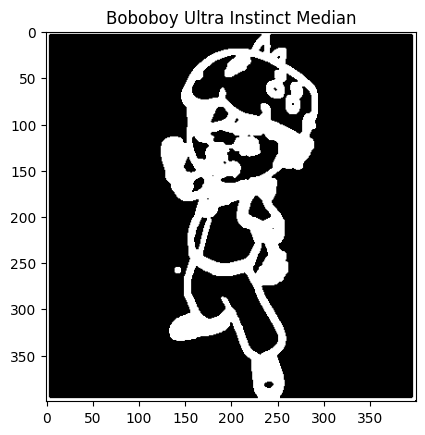

In [33]:
ultra_instinct_dengan_median = median_filter(boboboy_ultra_instinct, 3)
plt.imshow(ultra_instinct_dengan_median, cmap='gray')
plt.title('Boboboy Ultra Instinct Median')
plt.axis('on')
plt.show()

# MENGUBAH WARNA DARI BOBOBOY

In [34]:
boboboy_asli = cv2.imread('Assets/boboiboy.jpg')
boboboy_rgb = cv2.cvtColor(boboboy_asli, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(boboboy_rgb)
r_inv = 255 - r
g_inv = 255 - g
b_inv = 255 - b

boboboy_api = np.zeros_like(boboboy_rgb)
boboboy_api[:, :, 0] = r_inv

boboboy_angin = np.zeros_like(boboboy_rgb)
boboboy_angin[:, :, 1] = g_inv
boboboy_air = np.zeros_like(boboboy_rgb)
boboboy_air[:, :, 2] = b_inv

# MENAMPILKAN GAMBAR BOBOBOY YANG SUDAH BERUBAH WARNA

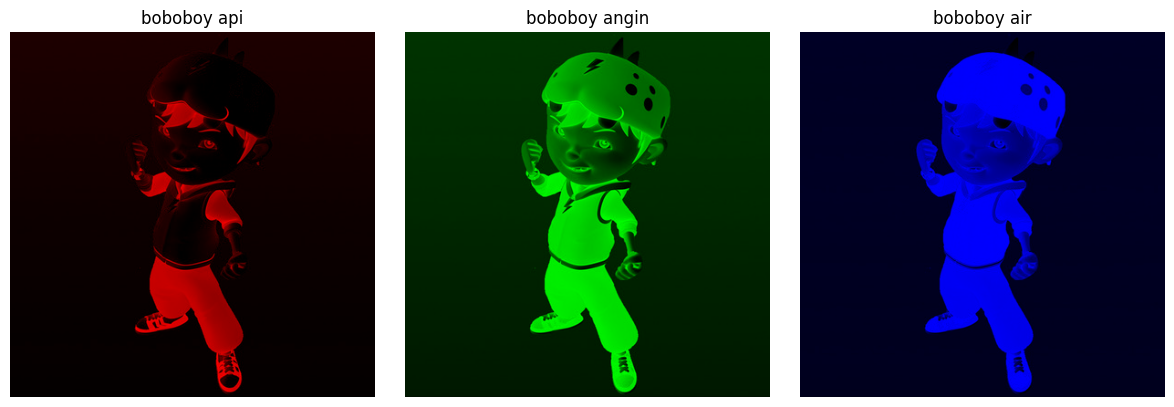

In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(boboboy_api)
plt.title("boboboy api")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(boboboy_angin)
plt.title("boboboy angin")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(boboboy_air)
plt.title("boboboy air")
plt.axis('off')

plt.tight_layout()
plt.show()